# 1.Pandas

Introduction:


Pandas ia a popoular python library for data analysis and manioulation. It provide efficient data structure like Series(1D) and  DataFrame (2D) for handling structured data.

Key Features:
* Fast and flexible data handling.
* Powerful indexing and slicing.
* Build-in data cleaning and transformation.
* Support grouping, aggregation, and visualization.
* Integrates well with NumPy, Matplotlib, and databases.

Installation

In [1]:
pip install pandas

Import pandas library

In [2]:
import pandas as pd

# 2.Key Data Structure

# > Series

A series is a one-dimensional labeled array, It can store data of any type (integer,string,float,etc.), and has an associated index (labels for each element in the series).
* Creation - You can create a series from a list, NumPy arrray, or dictionary.
* Indexing - Like a dictionary, a series can be indexed using labels(or integer positions).
* Operations - You can perform arithmetic operations, filtering, and manipulation directly on a series.

# > DataFrame

A DataFrame is a two-dimensional table-like structure, consisting of rows and columns. Each columns is a series, and ir can hold data of different types across columns (e.g, interger in one column, string in another).
* Creation - You can create a DataFrame from a dictionary,lists, NumPy arrays, or another DataFrame.
* Indexing - You can access rows, columns, and specific data points using labels or integers positions.
* Operations - You can perform a wide range of operations such as filtering, sorting, grouping, aggregating, and reshaping.

# Creating Data Structure

In [3]:
series = pd.Series([10,20,30,40,50])
print(series)

0    10
1    20
2    30
3    40
4    50
dtype: int64


In [4]:
data = {'Name':['raj', 'suhas', 'akash'],'Marks':[78,85,97],'Age':[23,21,20]}
df = pd.DataFrame(data)
print(df)

    Name  Marks  Age
0    raj     78   23
1  suhas     85   21
2  akash     97   20


# 3.Data Operations

* Selecting Columns

In [5]:
# Single column: Returns a pandas series.
df['Name']

0      raj
1    suhas
2    akash
Name: Name, dtype: object

* Multiple column: Returns a DataFrame.

In [6]:
df[['Name','Marks']]

,Name,Marks
0,raj,78
1,suhas,85
2,akash,97


# > Indexing in Pandas

Indexing refers to selecting specific rows, columns, or elements from a Series or DataFrame. 

Label-based indexing (loc[])

* Used when selecting data by row/column labels.
* Include both the start and end index in slicing.

In [7]:
df = pd.DataFrame(data, index=['A','B',"C"])

In [8]:
df

,Name,Marks,Age
A,raj,78,23
B,suhas,85,21
C,akash,97,20


* Selecting row using lock

In [9]:
df.loc["A"]

Name     raj
Marks     78
Age       23
Name: A, dtype: object

* select multiple rows

In [10]:
df.loc[['A','C']]

,Name,Marks,Age
A,raj,78,23
C,akash,97,20


* Select a range of rows

In [11]:
df.loc['A':"c"]

,Name,Marks,Age
A,raj,78,23
B,suhas,85,21
C,akash,97,20


* Select a specific value

In [12]:
df.loc['B','Marks']

85

Position-based indexing (iloc[])
* Used when selecting data by numerical row/column positions.
* Excludes the end index in slicing.

In [13]:
# select a row using iloc[]
df.iloc[1]

Name     suhas
Marks       85
Age         21
Name: B, dtype: object

In [14]:
# select multiple rows
df.iloc[[0,2]]

,Name,Marks,Age
A,raj,78,23
C,akash,97,20


In [15]:
# select a range of rows
df.iloc[0:3]

,Name,Marks,Age
A,raj,78,23
B,suhas,85,21
C,akash,97,20


In [16]:
# select a specific value
df.iloc[1,1]

85

# > Slicing in pandas

In pandas "Slicing" refers to accessing specific parts or subsets of data from a DataFrame or Series. It can be done using various methods like .loc[], .iloc[], or direct indexing. Here's a quick overview of how slicing works with pandas:

* Slicing with .loc[] (label-based indexing)

Syntax = df.loc[startrow:endrow,startcol:endcol]

In [17]:
df

,Name,Marks,Age
A,raj,78,23
B,suhas,85,21
C,akash,97,20


In [18]:
# Row slicing
df.loc['A':'B']

,Name,Marks,Age
A,raj,78,23
B,suhas,85,21


In [19]:
# Column slicing
df.loc[:,'Name':'Marks']

,Name,Marks
A,raj,78
B,suhas,85
C,akash,97


* Slicing with .iloc[] (position-based slicing)

Syntax: df.iloc[start_row:end_row, start_column:end_column]

In [20]:
# Rows slicing
df.iloc[0:2]

,Name,Marks,Age
A,raj,78,23
B,suhas,85,21


In [21]:
# Column slicing
df.iloc[:,1:]

,Marks,Age
A,78,23
B,85,21
C,97,20


# Data Cleaning

Data cleaning is an essential step in data preprocessing to ensure data is accurate, consistent, and ready for analysis. pandas privides powerful tools for handling missing values, duplicate data, incorrect formats, and inconsistenr values.

In [22]:
# Sample data for Apple products
import numpy as np 

data = {
    'Product_ID': [101, 102, 103, 104, 105, 106],
    'Product_Name': ['iPhone 12', 'iPhone 12', 'MacBook Pro', 'iPhone 13', np.nan, 'iPad Pro'],
    'Price': [799, np.nan, 1299, 999, 899, 799],
    'Launch_Date': ['2020-10-23', '2020-10-23', '2020-11-10', '2021-09-24', '2021-09-24', '2021-04-30'],
    'Stock': [50, 30, 20, np.nan, 40, 100],
    'Category': ['Smartphone', 'Smartphone', 'Laptop', 'Smartphone', 'Smartphone', 'Tablet']
}

# Create the DataFrame
df = pd.DataFrame(data)
df

,Product_ID,Product_Name,Price,Launch_Date,Stock,Category
0,101,iPhone 12,799.0,2020-10-23,50.0,Smartphone
1,102,iPhone 12,NaN,2020-10-23,30.0,Smartphone
2,103,MacBook Pro,1299.0,2020-11-10,20.0,Laptop
3,104,iPhone 13,999.0,2021-09-24,NaN,Smartphone
4,105,NaN,899.0,2021-09-24,40.0,Smartphone
5,106,iPad Pro,799.0,2021-04-30,100.0,Tablet


# > Detecting missing values

* df.isnull():    Returns a DataFrame with True for missing values and False for non-missing values.

In [23]:
df.isnull()

,Product_ID,Product_Name,Price,Launch_Date,Stock,Category
0,False,False,False,False,False,False
1,False,False,True,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,True,False
4,False,True,False,False,False,False
5,False,False,False,False,False,False


* df.isnull().sum():  Counts the numbers of missnig values in each columns.  

In [24]:
df.isnull().sum()

Product_ID      0
Product_Name    1
Price           1
Launch_Date     0
Stock           1
Category        0
dtype: int64

* df.notnull(): Returns True for non-missing values and False for missing values.

In [25]:
df.notnull()

,Product_ID,Product_Name,Price,Launch_Date,Stock,Category
0,True,True,True,True,True,True
1,True,True,False,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,False,True
4,True,False,True,True,True,True
5,True,True,True,True,True,True


# > Dropping missing values

* df.dropna(): Removes rows with any missing values.

In [26]:
df.dropna()

,Product_ID,Product_Name,Price,Launch_Date,Stock,Category
0,101,iPhone 12,799.0,2020-10-23,50.0,Smartphone
2,103,MacBook Pro,1299.0,2020-11-10,20.0,Laptop
5,106,iPad Pro,799.0,2021-04-30,100.0,Tablet


* df.dropna(axis=1): Removes columns with any missing values

In [27]:
df.dropna(axis=1)

,Product_ID,Launch_Date,Category
0,101,2020-10-23,Smartphone
1,102,2020-10-23,Smartphone
2,103,2020-11-10,Laptop
3,104,2021-09-24,Smartphone
4,105,2021-09-24,Smartphone
5,106,2021-04-30,Tablet


* df.dropna(subset=['Column']): Drops rows where a specific column has missing values.

In [28]:
df.dropna(subset=['Product_Name','Stock'])

,Product_ID,Product_Name,Price,Launch_Date,Stock,Category
0,101,iPhone 12,799.0,2020-10-23,50.0,Smartphone
1,102,iPhone 12,NaN,2020-10-23,30.0,Smartphone
2,103,MacBook Pro,1299.0,2020-11-10,20.0,Laptop
5,106,iPad Pro,799.0,2021-04-30,100.0,Tablet


# > Filling missing values

* df.fillna(value): Replace NaN with a specific value.

In [29]:
df.fillna(78)

,Product_ID,Product_Name,Price,Launch_Date,Stock,Category
0,101,iPhone 12,799.0,2020-10-23,50.0,Smartphone
1,102,iPhone 12,78.0,2020-10-23,30.0,Smartphone
2,103,MacBook Pro,1299.0,2020-11-10,20.0,Laptop
3,104,iPhone 13,999.0,2021-09-24,78.0,Smartphone
4,105,78,899.0,2021-09-24,40.0,Smartphone
5,106,iPad Pro,799.0,2021-04-30,100.0,Tablet


* df["col"].fillna(df['col'].mean()): Replace NaN with column mean

In [30]:
df.fillna(df['Price'].mean())

,Product_ID,Product_Name,Price,Launch_Date,Stock,Category
0,101,iPhone 12,799.0,2020-10-23,50.0,Smartphone
1,102,iPhone 12,959.0,2020-10-23,30.0,Smartphone
2,103,MacBook Pro,1299.0,2020-11-10,20.0,Laptop
3,104,iPhone 13,999.0,2021-09-24,959.0,Smartphone
4,105,959.0,899.0,2021-09-24,40.0,Smartphone
5,106,iPad Pro,799.0,2021-04-30,100.0,Tablet


* df.fillna(method='ffill'): Forward fill (Use previos value). 

In [31]:
df.fillna(method='ffill')

,Product_ID,Product_Name,Price,Launch_Date,Stock,Category
0,101,iPhone 12,799.0,2020-10-23,50.0,Smartphone
1,102,iPhone 12,799.0,2020-10-23,30.0,Smartphone
2,103,MacBook Pro,1299.0,2020-11-10,20.0,Laptop
3,104,iPhone 13,999.0,2021-09-24,20.0,Smartphone
4,105,iPhone 13,899.0,2021-09-24,40.0,Smartphone
5,106,iPad Pro,799.0,2021-04-30,100.0,Tablet


* df.fillna(method='bfill'): Backward fill (Use next value).

In [32]:
df.fillna(method='bfill')

,Product_ID,Product_Name,Price,Launch_Date,Stock,Category
0,101,iPhone 12,799.0,2020-10-23,50.0,Smartphone
1,102,iPhone 12,1299.0,2020-10-23,30.0,Smartphone
2,103,MacBook Pro,1299.0,2020-11-10,20.0,Laptop
3,104,iPhone 13,999.0,2021-09-24,40.0,Smartphone
4,105,iPad Pro,899.0,2021-09-24,40.0,Smartphone
5,106,iPad Pro,799.0,2021-04-30,100.0,Tablet


# > Renaming in Pandas

Renaming in pandas helps to modify column and index names to improve data readability and consistency.

Renaming specific columns:  
    
    * df.rename(columns={'old_name':'new_name'}) : Rename a specific column.
    * df.rename(columns={'old1':'new1','old2':'new2'}) : Rename multiple column.
    * df.rename(columns={'old':'new'},inplace=True) : update the DataFrame directly.

In [33]:
df.rename(columns={'Product_ID':'Id'})

,Id,Product_Name,Price,Launch_Date,Stock,Category
0,101,iPhone 12,799.0,2020-10-23,50.0,Smartphone
1,102,iPhone 12,NaN,2020-10-23,30.0,Smartphone
2,103,MacBook Pro,1299.0,2020-11-10,20.0,Laptop
3,104,iPhone 13,999.0,2021-09-24,NaN,Smartphone
4,105,NaN,899.0,2021-09-24,40.0,Smartphone
5,106,iPad Pro,799.0,2021-04-30,100.0,Tablet


In [34]:
df.rename(columns={'Product_ID':'Id','Product_Name':'Name'})

,Id,Name,Price,Launch_Date,Stock,Category
0,101,iPhone 12,799.0,2020-10-23,50.0,Smartphone
1,102,iPhone 12,NaN,2020-10-23,30.0,Smartphone
2,103,MacBook Pro,1299.0,2020-11-10,20.0,Laptop
3,104,iPhone 13,999.0,2021-09-24,NaN,Smartphone
4,105,NaN,899.0,2021-09-24,40.0,Smartphone
5,106,iPad Pro,799.0,2021-04-30,100.0,Tablet


In [35]:
df.rename(columns={'Product_ID':'Id'},inplace=True)
df

,Id,Product_Name,Price,Launch_Date,Stock,Category
0,101,iPhone 12,799.0,2020-10-23,50.0,Smartphone
1,102,iPhone 12,NaN,2020-10-23,30.0,Smartphone
2,103,MacBook Pro,1299.0,2020-11-10,20.0,Laptop
3,104,iPhone 13,999.0,2021-09-24,NaN,Smartphone
4,105,NaN,899.0,2021-09-24,40.0,Smartphone
5,106,iPad Pro,799.0,2021-04-30,100.0,Tablet


Rename all columns:  
* df.columns = ['new1','new2','new3'] : Assign new names to all columns.

In [36]:
df.columns = ["A","B","C","D","E","F"]
df

,A,B,C,D,E,F
0,101,iPhone 12,799.0,2020-10-23,50.0,Smartphone
1,102,iPhone 12,NaN,2020-10-23,30.0,Smartphone
2,103,MacBook Pro,1299.0,2020-11-10,20.0,Laptop
3,104,iPhone 13,999.0,2021-09-24,NaN,Smartphone
4,105,NaN,899.0,2021-09-24,40.0,Smartphone
5,106,iPad Pro,799.0,2021-04-30,100.0,Tablet


Rename specific index (rows) values
* df.rename(index={old:new}) : Rename specific index labels.

In [37]:
df.rename(index={1:"B"})

,A,B,C,D,E,F
0,101,iPhone 12,799.0,2020-10-23,50.0,Smartphone
B,102,iPhone 12,NaN,2020-10-23,30.0,Smartphone
2,103,MacBook Pro,1299.0,2020-11-10,20.0,Laptop
3,104,iPhone 13,999.0,2021-09-24,NaN,Smartphone
4,105,NaN,899.0,2021-09-24,40.0,Smartphone
5,106,iPad Pro,799.0,2021-04-30,100.0,Tablet


In [38]:
df.rename(index={"B":1})

,A,B,C,D,E,F
0,101,iPhone 12,799.0,2020-10-23,50.0,Smartphone
1,102,iPhone 12,NaN,2020-10-23,30.0,Smartphone
2,103,MacBook Pro,1299.0,2020-11-10,20.0,Laptop
3,104,iPhone 13,999.0,2021-09-24,NaN,Smartphone
4,105,NaN,899.0,2021-09-24,40.0,Smartphone
5,106,iPad Pro,799.0,2021-04-30,100.0,Tablet


Rename all index labels
* df.index = ['row1','row2'] : Assign new index label.

# > Filtering

Filtering in pandas allows selecting specific rows based on conditions, making it useful for data analysis and preprocessing.

In [39]:
df

,A,B,C,D,E,F
0,101,iPhone 12,799.0,2020-10-23,50.0,Smartphone
1,102,iPhone 12,NaN,2020-10-23,30.0,Smartphone
2,103,MacBook Pro,1299.0,2020-11-10,20.0,Laptop
3,104,iPhone 13,999.0,2021-09-24,NaN,Smartphone
4,105,NaN,899.0,2021-09-24,40.0,Smartphone
5,106,iPad Pro,799.0,2021-04-30,100.0,Tablet


In [40]:
df[df["C"] > 800] # Filter rows where column values are greater than a specific value.

,A,B,C,D,E,F
2,103,MacBook Pro,1299.0,2020-11-10,20.0,Laptop
3,104,iPhone 13,999.0,2021-09-24,NaN,Smartphone
4,105,NaN,899.0,2021-09-24,40.0,Smartphone


In [41]:
df[df["C"] < 800]  # Filter rows where column value is less than specific value.

,A,B,C,D,E,F
0,101,iPhone 12,799.0,2020-10-23,50.0,Smartphone
5,106,iPad Pro,799.0,2021-04-30,100.0,Tablet


In [42]:
df[(df["C"]>800) & (df["E"]<50)]  # Filters rows meeting multiple conditions using AND (&)

,A,B,C,D,E,F
2,103,MacBook Pro,1299.0,2020-11-10,20.0,Laptop
4,105,NaN,899.0,2021-09-24,40.0,Smartphone


# Aggregation and Grouping

Using groupby()
* df.groupby('col') : Groups the DataFrame by a columns (or columns)

In [43]:
data = {
    'Salesperson': ['Alice', 'Bob', 'Alice', 'Charlie', 'Bob', 'Alice', 'Charlie', 'Bob', 'Alice'],
    'Region': ['North', 'South', 'North', 'West', 'South', 'North', 'West', 'South', 'North'],
    'Product': ['A', 'B', 'A', 'C', 'A', 'B', 'A', 'C', 'C'],
    'Sale Amount': [100, 200, 150, 120, 300, 200, 250, 400, 50],
    'Date': ['2025-01-01', '2025-01-02', '2025-01-05', '2025-01-03', '2025-01-04', '2025-01-07', '2025-01-06', '2025-01-08', '2025-01-10']
}

# Create DataFrame
df = pd.DataFrame(data)


In [44]:
df

,Salesperson,Region,Product,Sale Amount,Date
0,Alice,North,A,100,2025-01-01
1,Bob,South,B,200,2025-01-02
2,Alice,North,A,150,2025-01-05
3,Charlie,West,C,120,2025-01-03
4,Bob,South,A,300,2025-01-04
5,Alice,North,B,200,2025-01-07
6,Charlie,West,A,250,2025-01-06
7,Bob,South,C,400,2025-01-08
8,Alice,North,C,50,2025-01-10


In [45]:
df.groupby('Salesperson')

In [46]:
df.groupby('Salesperson')['Sale Amount'].sum().reset_index() 

,Salesperson,Sale Amount
0,Alice,500
1,Bob,900
2,Charlie,370


.groupby('Salesperson') Groups the data of salesperson.    
.sum() aggregates the sale amounts for each salesperson.

In [47]:
df.groupby('Salesperson')['Sale Amount'].mean().reset_index()

,Salesperson,Sale Amount
0,Alice,125.0
1,Bob,300.0
2,Charlie,185.0


In [48]:
df.groupby('Salesperson')['Sale Amount'].count().reset_index(name='SalesCount')

,Salesperson,SalesCount
0,Alice,4
1,Bob,3
2,Charlie,2


# Merging and Joining

Merging and joining in pandas are essential operations for combining two or more DataFrames based on a shared column or index. These operations are conceptually similar to SQL joins. 

# > Merg in Pandas

Syntax = pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False)

* left: Left DataFrame.
* right: Right DataFrame.
* how: Type of join ('inner', 'outer', 'left', 'right').
* on: Column name(s) on which to join. Must be present in both DataFrames.
* left_on: Column(s) from the left DataFrame to join on.
* right_on: Column(s) from the right DataFrame to join on.
* left_index: If True, use the index from the left DataFrame.
* right_index: If True, use the index from the right DataFrame.

 Inner Join (Default)
 * Inner join combines only the rows with matching keys.

In [49]:
# Create two DataFrames
df1 = pd.DataFrame({
    'A': ['A0', 'A1', 'A2', 'A3'],
    'B': ['B0', 'B1', 'B2', 'B3'],
    'key': ['K0', 'K1', 'K2', 'K3']
})

df2 = pd.DataFrame({
    'C': ['C0', 'C1', 'C2', 'C3'],
    'key': ['K0', 'K1', 'K2', 'K4']
})

# Merge DataFrames using inner join (default)
result = pd.merge(df1, df2, on='key')
result

,A,B,key,C
0,A0,B0,K0,C0
1,A1,B1,K1,C1
2,A2,B2,K2,C2


Explanation:

The rows where key values match are combined (K0, K1, K2). The row with K4 is excluded since it doesn't match any row in df1.

Left Join
* A left join combines all rows from the left DataFrame and the matching rows from the right DataFrame. If no match is found, it will return NaN for the columns from the right DataFrame.

In [50]:
result = pd.merge(df1, df2, on='key', how='left')
result

,A,B,key,C
0,A0,B0,K0,C0
1,A1,B1,K1,C1
2,A2,B2,K2,C2
3,A3,B3,K3,NaN


Explanation:

* All rows from df1 are included, and the corresponding values from df2 are added. Since there's no matching row for K3 in df2, it gets NaN in the C column.

Right Join
* A right join combines all rows from the right DataFrame and the matching rows from the left DataFrame. If no match is found, it will return NaN for the columns from the left DataFrame.

In [51]:
result = pd.merge(df1, df2, on='key', how='right')
result

,A,B,key,C
0,A0,B0,K0,C0
1,A1,B1,K1,C1
2,A2,B2,K2,C2
3,NaN,NaN,K4,C3


Explanation:

* All rows from df2 are included, and the corresponding rows from df1 are added. Since there's no matching row for K4 in df1, it gets NaN in the A and B columns.

Outer Join
* An outer join returns all rows from both DataFrames. Non-matching rows will have NaN for missing values.

In [52]:
result = pd.merge(df1, df2, on='key', how='outer')
result

,A,B,key,C
0,A0,B0,K0,C0
1,A1,B1,K1,C1
2,A2,B2,K2,C2
3,A3,B3,K3,NaN
4,NaN,NaN,K4,C3


Explanation:

* All rows from both DataFrames are included. If a key doesn't match, NaN is filled in for the columns of the other DataFrame.

# > Join in Pandas

The join() method is a simpler way to join DataFrames based on their indexes or a specific column. It defaults to a left join, and you can join on the index or on a specific column.

Syntax = DataFrame.join(other, on=None, how='left', lsuffix='', rsuffix='')


* other: DataFrame to join.
* on: Column to join on. If None, join on index.
* how: Type of join ('left', 'right', 'outer', 'inner').
* lsuffix: Suffix for overlapping column names from the left DataFrame.
* rsuffix: Suffix for overlapping column names from the right DataFrame.

In [53]:
df1 = pd.DataFrame({
    'A': ['A0', 'A1', 'A2', 'A3'],
    'B': ['B0', 'B1', 'B2', 'B3']
}, index=['K0', 'K1', 'K2', 'K3'])

df2 = pd.DataFrame({
    'C': ['C0', 'C1', 'C2', 'C3']
}, index=['K0', 'K1', 'K2', 'K4'])

# Join on index (left join by default)
result = df1.join(df2, how='left')
result

,A,B,C
K0,A0,B0,C0
K1,A1,B1,C1
K2,A2,B2,C2
K3,A3,B3,NaN


Explanation:

* The DataFrames are joined based on their indexes. The row for K3 in df1 doesn't have a match in df2, so it gets NaN in the C column.

Join on a Specific Column

In [54]:
df1 = pd.DataFrame({
    'key': ['K0', 'K1', 'K2', 'K3'],
    'A': ['A0', 'A1', 'A2', 'A3']
})

df2 = pd.DataFrame({
    'key': ['K0', 'K1', 'K2', 'K4'],
    'B': ['B0', 'B1', 'B2', 'B3']
})

# Join on a specific column (left join)
result = df1.set_index('key').join(df2.set_index('key'), how='left')
result

,A,B
key,,
K0,A0,B0
K1,A1,B1
K2,A2,B2
K3,A3,NaN


Explanation:

* Here, we set the key column as the index for both DataFrames before joining. The join happens based on the index key.

Summary of Join Types:
* Inner Join: Returns only the rows with matching keys in both DataFrames.
* Left Join: Returns all rows from the left DataFrame and matching rows from the right DataFrame.
* Right Join: Returns all rows from the right DataFrame and matching rows from the left DataFrame.
* Outer Join: Returns all rows from both DataFrames, filling with NaN where there's no match.

# Reading Files in Pandas

Syntax = pd.read_csv('file_path.csv', sep=',', header='infer', index_col=None, dtype=None)

* file_path: The path to the CSV file.
* sep: The delimiter (default is a comma).
* header: Row to use for column names (default is the first row).
* index_col: Column(s) to use as the index.
* dtype: Specify the data type for each column.

In [55]:
# Read a CSV file
df = pd.read_csv('tata_data.csv')

# Display the first few rows
df.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,TATAPOWER.NS,TATAPOWER.NS,TATAPOWER.NS,TATAPOWER.NS,TATAPOWER.NS,TATAPOWER.NS
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01,53.9232177734375,57.599998474121094,57.849998474121094,56.650001525878906,56.79999923706055,3878107
3,2020-01-02,54.29768371582031,58.0,58.150001525878906,56.79999923706055,57.900001525878906,12142359
4,2020-01-03,54.06364440917969,57.75,58.54999923706055,57.29999923706055,58.0,9746134


Reading an Excel File
* Pandas can read Excel files using the read_excel() function. To read from Excel, you need the openpyxl or xlrd library installed, depending on the Excel file type.

Syntax = pd.read_excel('file_path.xlsx', sheet_name='Sheet1', header=0, index_col=None)

* file_path: Path to the Excel file.
* sheet_name: Name of the sheet to read (default is the first sheet).
* header: Row(s) to use as the column names.
* index_col: Column(s) to set as the index.

Writing Files in Pandas

Writing a DataFrame to CSV
*To write a DataFrame to a CSV file, use the to_csv() function.

Syntax = df.to_csv('file_path.csv', sep=',', index=False)

* file_path: Path to save the CSV file.
* sep: Delimiter to use (default is a comma).
* index: Whether to write row names (index) (default is True).

Writing a DataFrame to Excel
* You can write a DataFrame to an Excel file using to_excel(). The openpyxl library is required for .xlsx files.

Syntax = df.to_excel('file_path.xlsx', sheet_name='Sheet1', index=False)


* sheet_name: Name of the Excel sheet.
* index: Whether to write the row names (index).

# Time Series

Time series in pandas is used for working with temporal data, where the data points are indexed by time. It allows for efficient handling, manipulation and analysis of time based data.

* Creating time series

In [57]:
date_range = pd.date_range(start='2025-01-01',end='2025-01-10',freq = 'D')
date_range  # Creates a range of dates between start and end with a specific freq.

DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
               '2025-01-05', '2025-01-06', '2025-01-07', '2025-01-08',
               '2025-01-09', '2025-01-10'],
              dtype='datetime64[ns]', freq='D')

* Time series indexing

In [59]:
# Creating a DataFrame with a date column
data = {'Date':pd.date_range('2025-01-01',periods=5,freq='D'),'Value':[100,200,300,400,500]}
df = pd.DataFrame(data)
# set date as index.
df.set_index('Date',inplace = True)
df

,Value
Date,
2025-01-01,100
2025-01-02,200
2025-01-03,300
2025-01-04,400
2025-01-05,500


* Converting to different freq.

In [71]:
df.resample('W').agg('sum')  # resample the data to a dofferent freq(eg.'D' for daily,'M' for monthly.)

,Value
Date,
2025-01-05,1500


# Visualization 

Pandas offers simple and quick plotting methods directly through the plot() function on DataFrame and series. Here's a summary of the type of plots you can create using pandas visualization.

* Line plot  
  
  A line plot is a default plot and is useful for showing trends over time or continuous data.

<Axes: title={'center': 'Sales over time'}, xlabel='Date'>

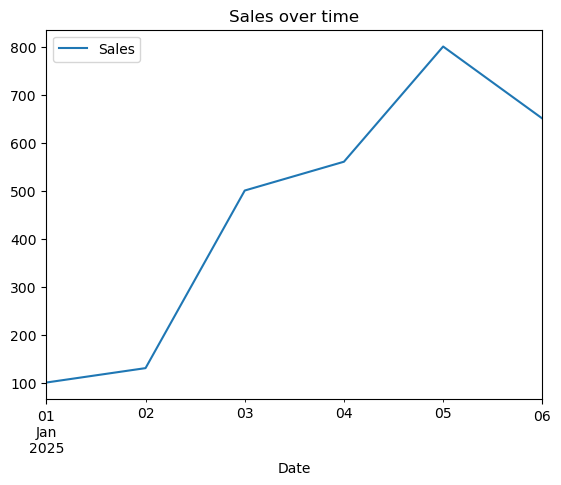

In [86]:
data = {'Date':pd.date_range('2025-01-01',periods = 6,freq = 'D'),'Sales':[100,130,500,560,800,650]}

df = pd.DataFrame(data)

df.plot(x='Date', y='Sales',kind='line',title='Sales over time')

* Bar plot  

  For comparing quantities between different categories , a bar plot is ideal.

<Axes: title={'center': 'comparison'}, xlabel='Date'>

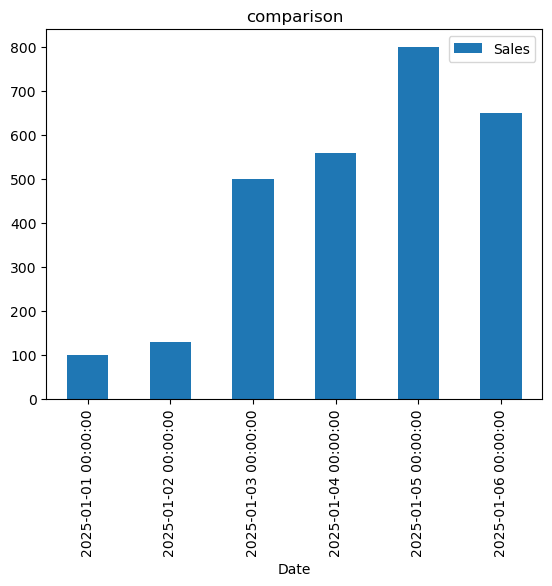

In [87]:
data = {'Date':pd.date_range('2025-01-01',periods = 6,freq = 'D'),'Sales':[100,130,500,560,800,650]}

df = pd.DataFrame(data)

df.plot(x='Date', y='Sales',kind='bar',title='comparison')

* Histogram  

  Histogram are used to visualize a distribution of a numerical column.

<Axes: title={'center': 'Age Distribution'}, ylabel='Frequency'>

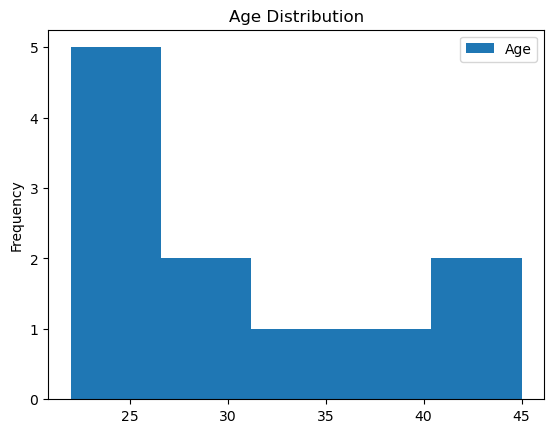

In [91]:
data = {'Age':[22,23,34,24,27,43,45,38,28,25,22]}
df = pd.DataFrame(data)
df.plot(kind="hist", y='Age', bins=5,title='Age Distribution')